<a href="https://colab.research.google.com/github/lazarosgogos/ML-exercises/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# -- PART 1 --

## Q1 - Load Dataset

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Q1
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plot Variables

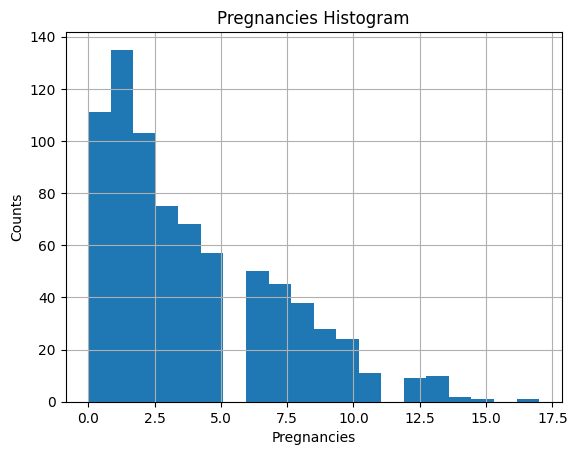

In [39]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

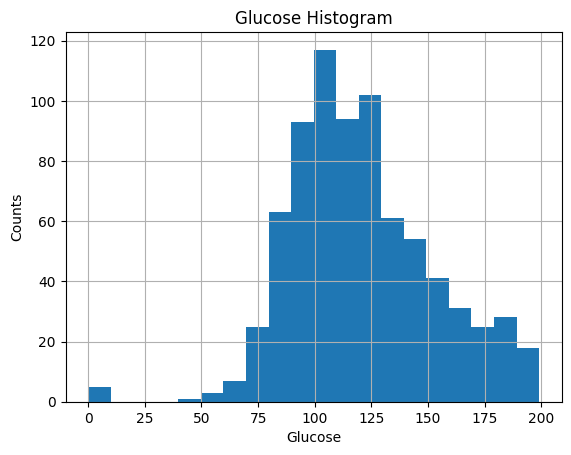

In [43]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

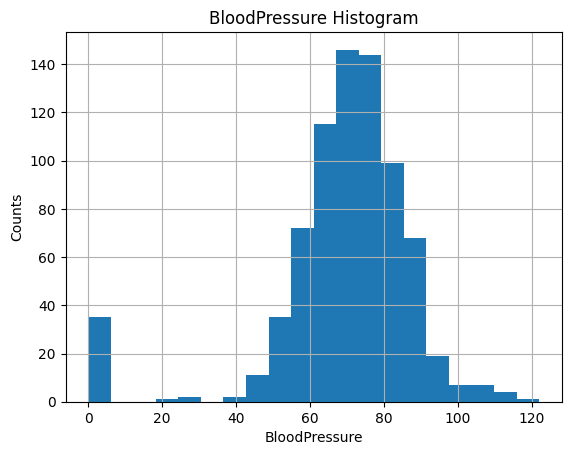

In [5]:
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

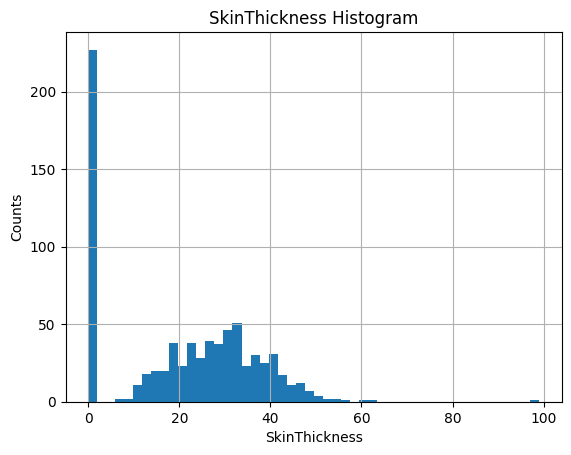

In [41]:
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
df['SkinThickness'].hist(bins=50)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

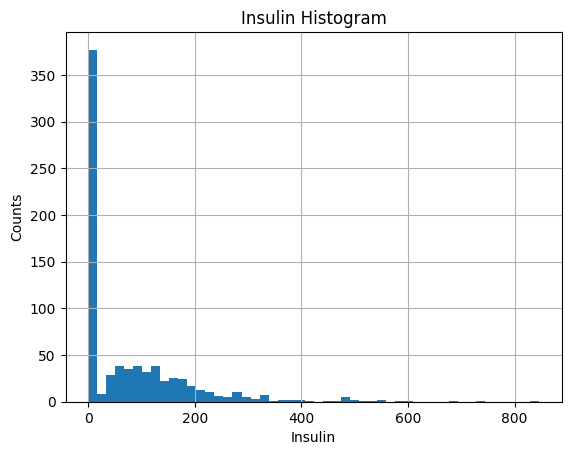

In [45]:
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
df['Insulin'].hist(bins=50)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

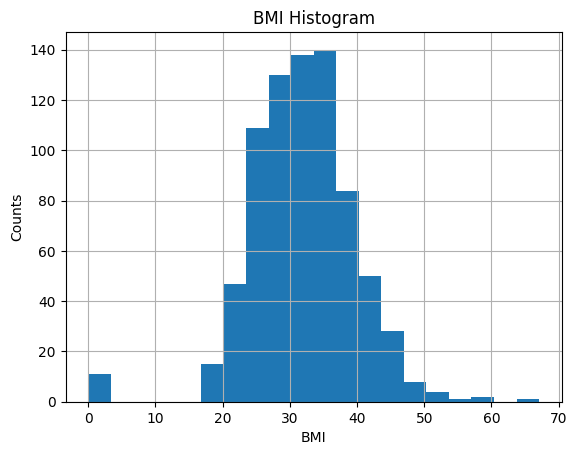

In [9]:
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

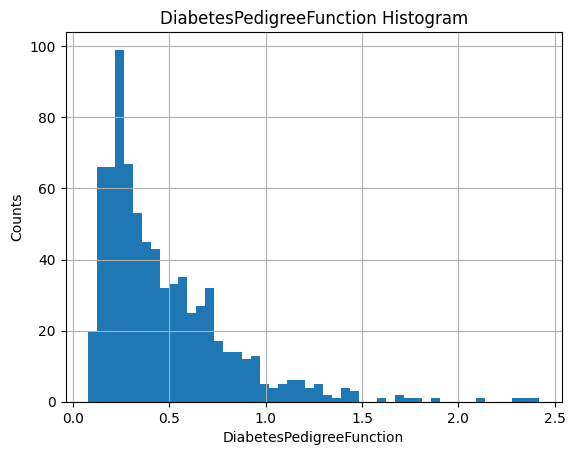

In [42]:
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
df['DiabetesPedigreeFunction'].hist(bins=50)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

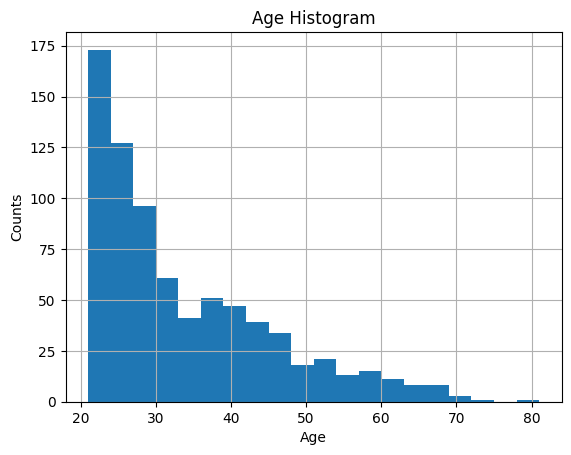

In [11]:
# BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

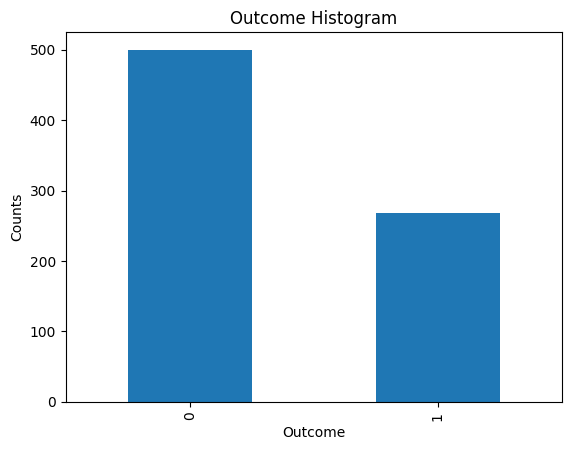

In [35]:
df['Outcome'].value_counts().plot.bar()
plt.title('Outcome Histogram')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

### Q2 - Data quality
The data quality is a little bit skewed towards non-diabetic (0 - non diabetics) samples. However, this should not affect our predictions, as there are plenty of positive examples as well, which our model can learn.

Also, another reason our dataset is good is the number of features it has. Having 9 features to train will result in a more robust model. Not too many, but not too few either.

## Q3 - Age distribution
The 'Age' feature appears to follow a power law distribution. This distribution, having most samples near the origin of the axes, is not the optimal for such problems, as the dataset is imbalanced. A better distribution would be one closer to the uniform distribution.

## Q4 - Glucose as the root cause of diabetes
As shown in the output of following code cell, glucose levels exhibit the strongest correlation with the outcome, followed by BMI.

In [61]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


## Q5 - Convert DataFrame to Numpy arrays

In [62]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

### Split Dataset to Train-Test

Train Samples: 691
Test Samples: 77

In [65]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

### Create a Logistic Regression Model

In [66]:
model = LogisticRegression(max_iter=1000, random_state=seed)

### Train model on training set

In [72]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Evaluate model on training set

In [73]:
# Evaluate model on training set
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model (on training data) is: {accuracy_percentage}')

The accuracy of the model (on training data) is: 76.54


### Evaluate Model on test set

In [75]:
y_pred = model.predict(x_test)
# y_pred

In [76]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92


## Q6
The accuracies between the train and test sets is pretty much the same (`76.54` vs `77.92`, respectively). This means our model works quite well, while it is not overfit on the train data.

## Q7 - Classifying for ages [0-25, 25-50, 50-100]

The accuracy of the model is (age<25):    83.78
The accuracy of the model is (25<age<50): 70.09
The accuracy of the model is (age>50):    90.48


<BarContainer object of 3 artists>

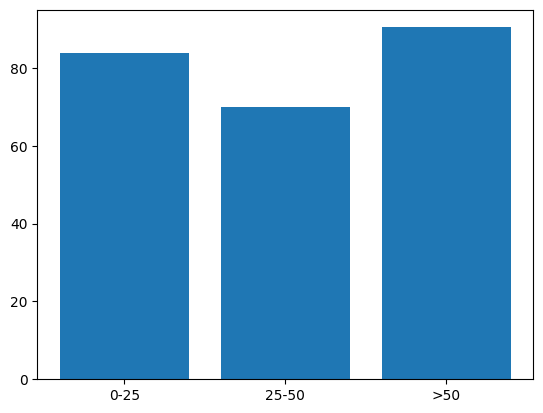

In [87]:
# Create a mask that filters patients with age < 25. Age is found at x_test[:, 7]
age_index = 7
mask_25 = x_test[:, 7] < 25
mask_25_50 = (x_test[:, 7] > 25) & (x_test[:, 7] < 50)
mask_50 = x_test[:, 7] > 50

x_test_25 = x_test[mask_25]
y_test_25 = y_test[mask_25]
y_pred_25 = model.predict(x_test_25)

x_test_25_50 = x_test[mask_25_50]
y_test_25_50 = y_test[mask_25_50]
y_pred_25_50 = model.predict(x_test_25_50)

x_test_50 = x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = model.predict(x_test_50)

accuracy25 = accuracy_score(y_test_25, y_pred_25)
accuracy25_50 = accuracy_score(y_test_25_50, y_pred_25_50)
accuracy50 = accuracy_score(y_test_50, y_pred_50)
accuracy_percentage_25 = round(accuracy25*100, 2)
accuracy_percentage_25_50 = round(accuracy25_50*100, 2)
accuracy_percentage_50 = round(accuracy50*100, 2)

print(f'The accuracy of the model is (age<25):    {accuracy_percentage_25}')
print(f'The accuracy of the model is (25<age<50): {accuracy_percentage_25_50}')
print(f'The accuracy of the model is (age>50):    {accuracy_percentage_50}')\

plt.bar(['0-25', '25-50', '>50'], [accuracy_percentage_25, accuracy_percentage_25_50, accuracy_percentage_50])

As shown in the bar plot above, the most accurate predictions take place for people > 50 (90% accuracy).

The second most accurate predictions take place for the people aged below 25 (83% accuracy).

Finally, the predictions for people aged between 25-50 have the worst accuracy (70%) out of the three subgroups.

## Q8 - Bias towards positive or negative prediction
In this case, it would be worse for our classifier to predict someone does not have diabetes and them actually having it, instead of the opposite. In medical cases, predicting a False Positive is less harmful then predicting a False Negative.

A False Positive can be mitigated by a second, more thorough examination, whereas a False Negative can prove detrimental to a person.

In [96]:
seed = 0
accuracies = []
for seed in range(0,10):
  test_size = 0.3

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)
  accuracies.append(accuracy_percentage)

accuracies_df = pd.DataFrame(accuracies)
print(f'The mean is {accuracies_df.mean()[0]}% and the standard deviation is \
{round(accuracies_df.std()[0], 2)}%, across ten runs (seeds 0 through 9)')

The mean is 77.27% and the standard deviation is 1.97%, across ten runs (seeds 0 through 9)


## Q9 - Applying normalization

The accuracy of the model (after scaling) is: 76.62


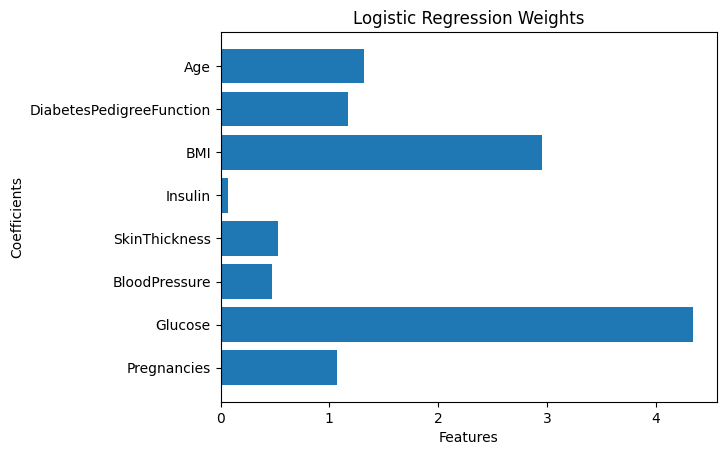

In [120]:
scaler = MinMaxScaler()
features = df.drop('Outcome', axis=1)
df_scaled = df.copy()
df_scaled[features.columns] = scaler.fit_transform(features)
df_scaled.describe()

input_df = df_scaled.drop(columns=['Outcome'])
targets_df = df_scaled['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model (after scaling) is: {accuracy_percentage}')

coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

After scaling the inputs using min-max scaling and viewing the model's coefficients (feature importance), the above plot can be generated.

The plot above shows the top-3 factors in predicting diabetes are (in order):
1. Glucose levels
2. BMI
3. Age

# -- PART 2 --

## Q1 - Linear Regressor

In [165]:
df = pd.read_csv('diabetes.csv')
x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']].to_numpy()
y = df['Glucose'].to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = LinearRegression(fit_intercept=True, n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'Root of MSE: {mse**0.5:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 929.89
Root of MSE: 30.49
MAE: 23.60


## Q2 - MAE and MSE comparison

The Mean Squared Error is ≈ 930 (RMSE≈30), whereas the Mean Absolute Error is ≈ 24. This means that the model has some big prediction errors. There are some outliers in the predictions. Therefore, in this case the Mean Absolute Error might be more appropriate in this case

## Q3 - Lasso Regression

In [173]:
df = pd.read_csv('diabetes.csv')
selection=['Pregnancies', 'BloodPressure', 'BMI', 'Age']
xdf = df[selection]
ydf = df.drop(columns=['Glucose'])
x = df[selection].to_numpy()
y = df['Glucose'].to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
alpha_values = np.arange(0.2, 1.2, 0.2)
results_mse = []
results_mae = []
for alpha in alpha_values:

  model = Lasso(alpha, fit_intercept=True, random_state=seed)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  results_mse.append(mse)
  results_mae.append(mae)

res = pd.DataFrame([results_mae, results_mse], columns=alpha_values, index=['MAE', 'MSE'])
res

,0.2,0.4,0.6,0.8,1.0
MAE,23.594203,23.588415,23.582629,23.576843,23.571058
MSE,929.715925,929.555701,929.407728,929.271958,929.148391


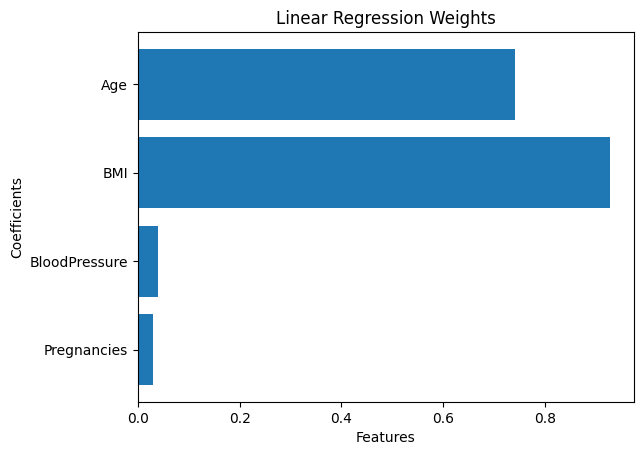

In [174]:
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(xdf.columns, importance_weights)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

As per the above bar plot, the least significant coefficient is the Pregnancies feature. Let's drop it and see how the model is affected.

In [175]:

df = pd.read_csv('diabetes.csv')
x = df[['BloodPressure', 'BMI', 'Age']].to_numpy()
y = df['Glucose'].to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = LinearRegression(fit_intercept=True, n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'Root of MSE: {mse**0.5:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 930.40
Root of MSE: 30.50
MAE: 23.59


After dropping the least significant coefficient, the MSE grew from `929.8` to `930.4`, whereas the MAE decreased from `23.6` to `23.59`.